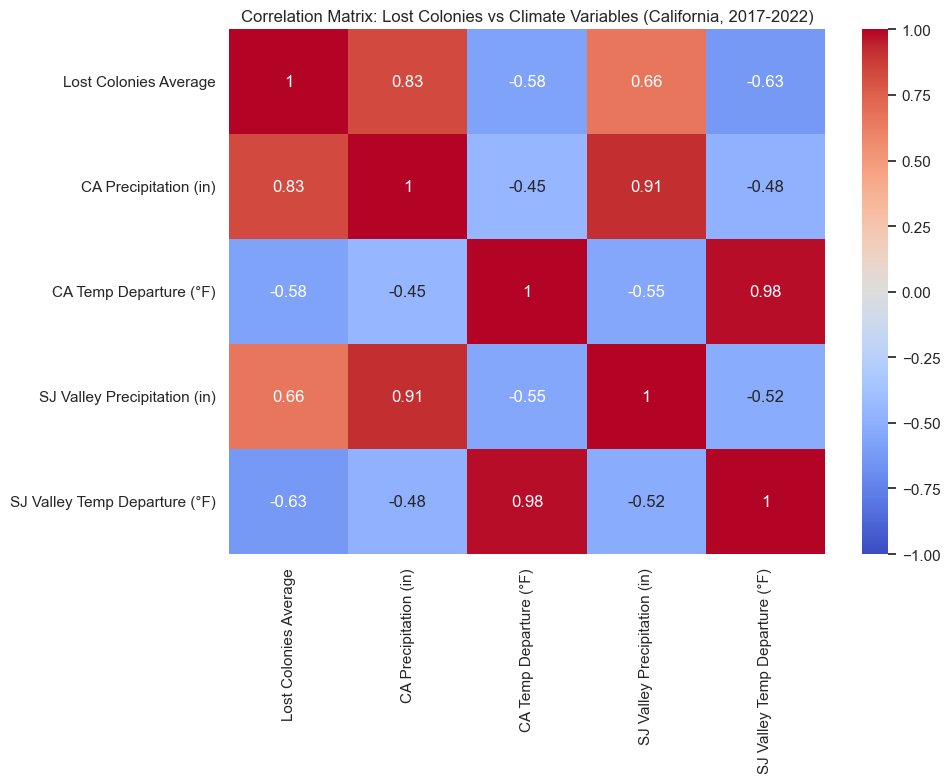

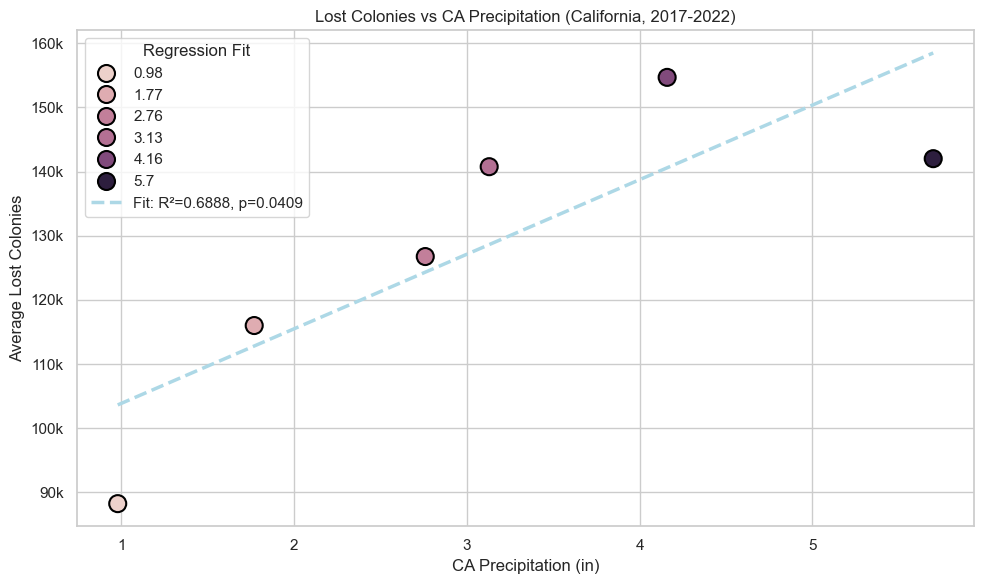

Pearson Correlation: 0.8300
Linear Regression: Slope = 11619.28, R-squared = 0.6888, p-value = 0.0409

Summary Statistics:
       Lost Colonies Average  CA Precipitation (in)  CA Temp Departure (°F)  \
count               6.000000               6.000000                6.000000   
mean           128069.444450               3.083333               -0.966667   
std             23644.321423               1.688889                2.562551   
min             88250.000000               0.980000               -3.200000   
25%            118687.500000               2.017500               -2.700000   
50%            133750.000000               2.945000               -2.200000   
75%            141687.500000               3.902500                1.150000   
max            154666.666700               5.700000                2.400000   

       SJ Valley Precipitation (in)  SJ Valley Temp Departure (°F)  
count                      6.000000                       6.000000  
mean                       

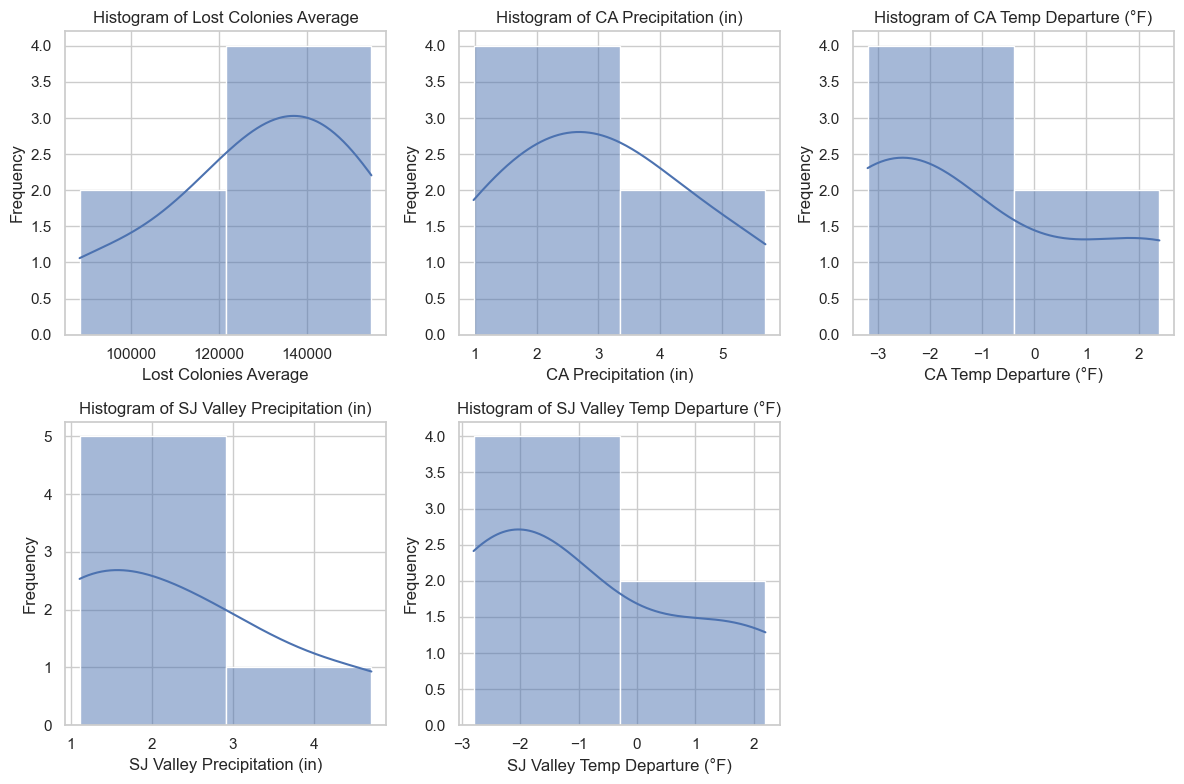

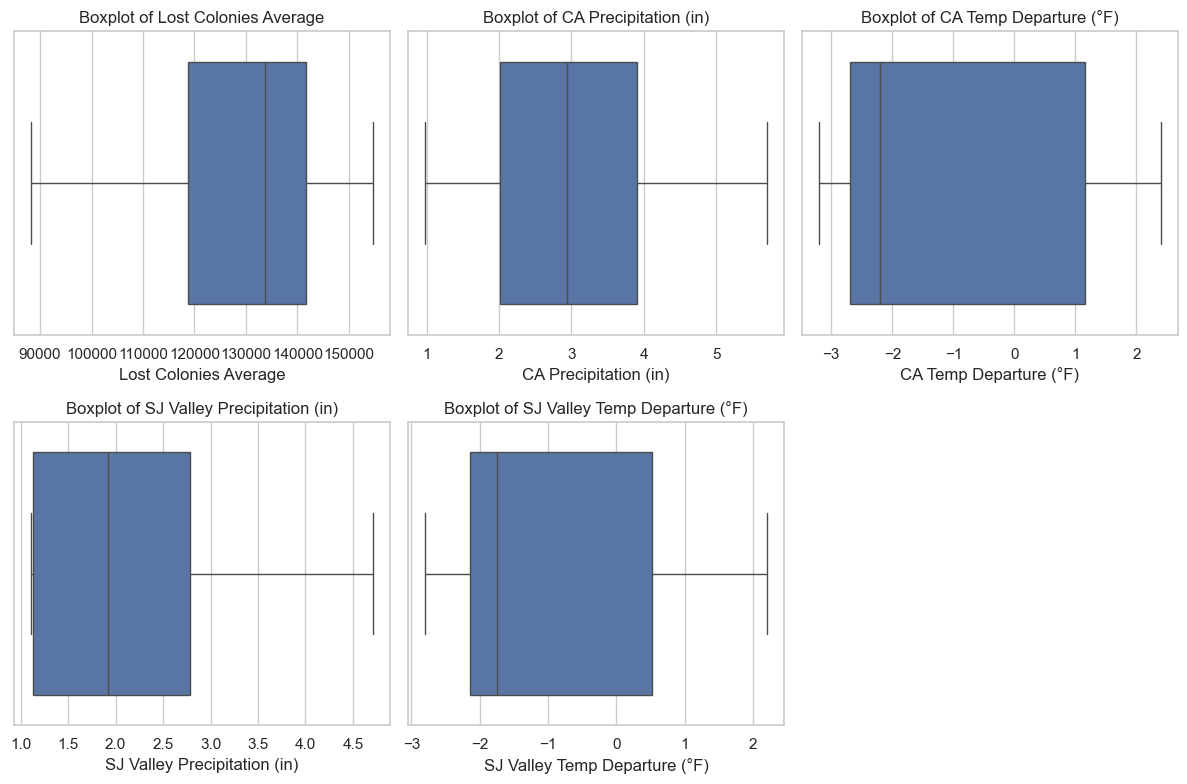

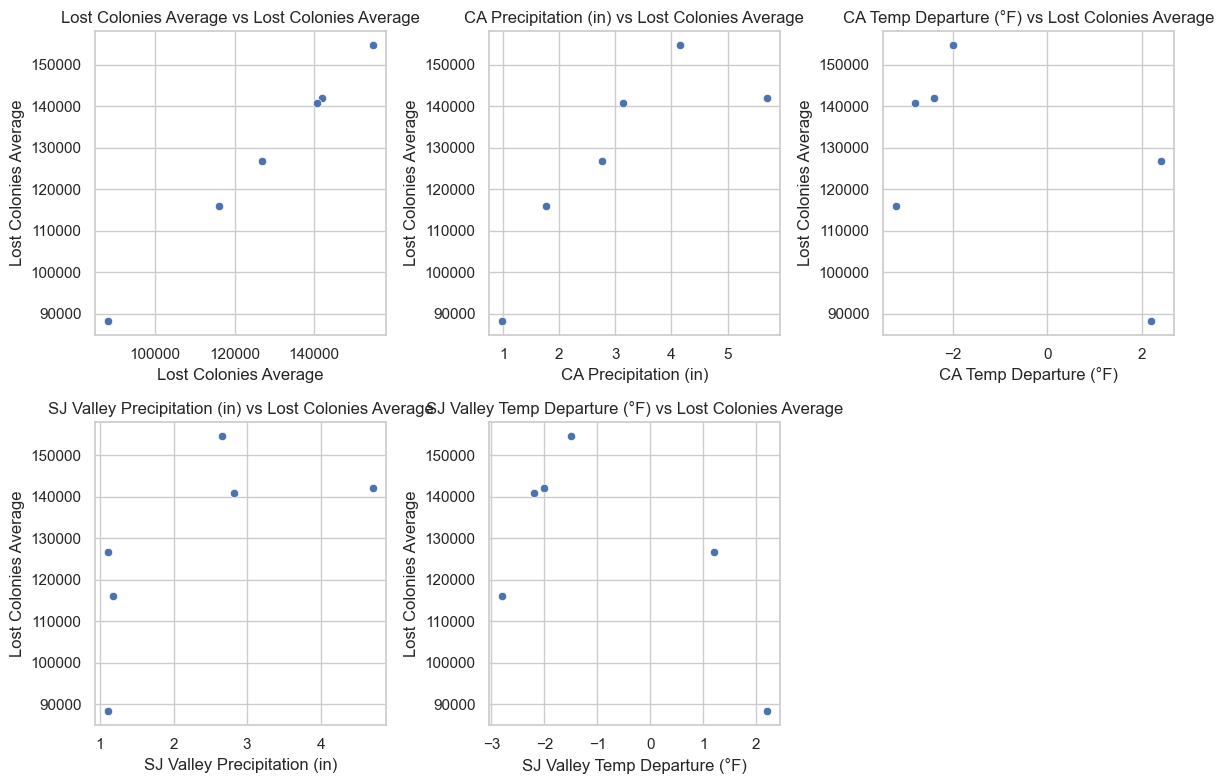


Correlation Matrix:
                               Lost Colonies Average  CA Precipitation (in)  \
Lost Colonies Average                       1.000000               0.829953   
CA Precipitation (in)                       0.829953               1.000000   
CA Temp Departure (°F)                     -0.575280              -0.451246   
SJ Valley Precipitation (in)                0.661737               0.914476   
SJ Valley Temp Departure (°F)              -0.625293              -0.480400   

                               CA Temp Departure (°F)  \
Lost Colonies Average                       -0.575280   
CA Precipitation (in)                       -0.451246   
CA Temp Departure (°F)                       1.000000   
SJ Valley Precipitation (in)                -0.546999   
SJ Valley Temp Departure (°F)                0.982045   

                               SJ Valley Precipitation (in)  \
Lost Colonies Average                              0.661737   
CA Precipitation (in)              

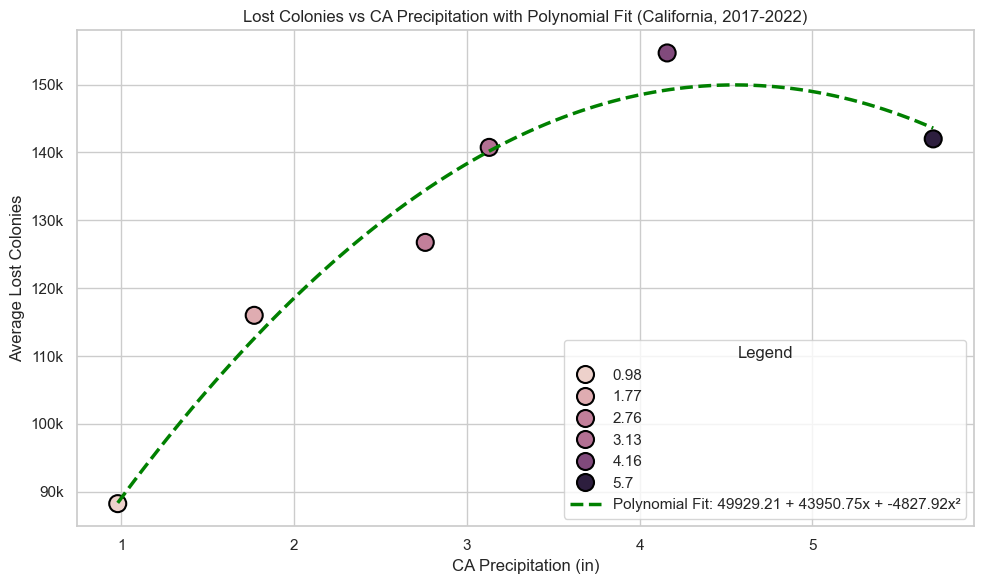

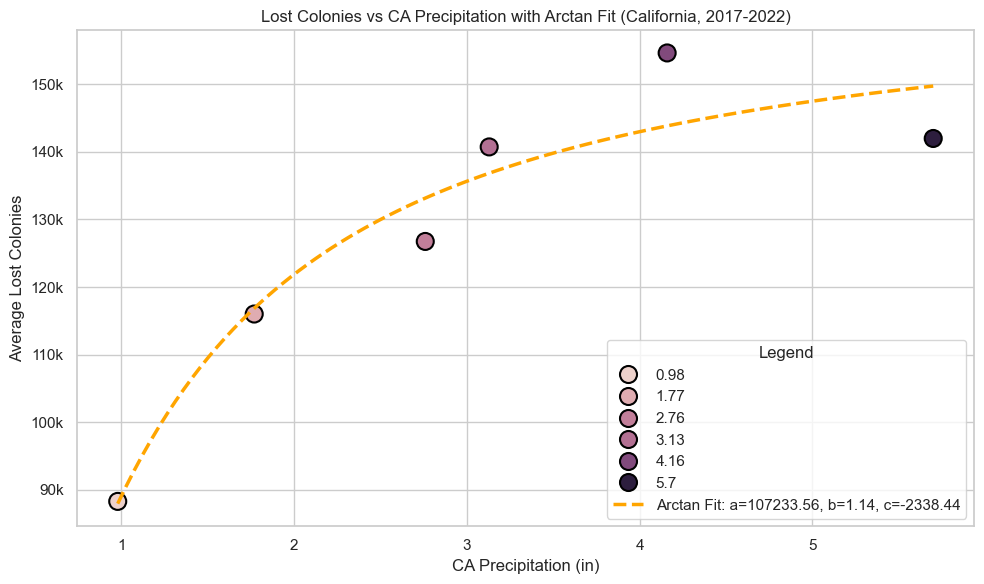

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress # we need this for linear regression
import numpy as np

sns.set(style="whitegrid") # Set the style for seaborn plots

# Data from the PDF
data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022],
    'Lost Colonies Average': [126750, 142000, 154666.6667, 140750, 116000, 88250],  # California honey bee data
    'CA Precipitation (in)': [2.76, 5.7, 4.16, 3.13, 1.77, 0.98],  # California precipitation
    'CA Temp Departure (°F)': [2.4, -2.4, -2.0, -2.8, -3.2, 2.2],  # California temp departure
    'SJ Valley Precipitation (in)': [1.11, 4.71, 2.66, 2.82, 1.18, 1.11],  # San Joaquin Valley precipitation
    'SJ Valley Temp Departure (°F)': [1.2, -2.0, -1.5, -2.2, -2.8, 2.2]  # San Joaquin Valley temp departure
}

# Create DataFrame
df = pd.DataFrame(data)


correlation_matrix = df[['Lost Colonies Average',
                        'CA Precipitation (in)',
                        'CA Temp Departure (°F)',
                        'SJ Valley Precipitation (in)',
                        'SJ Valley Temp Departure (°F)']].corr(method='pearson')


# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix: Lost Colonies vs Climate Variables (California, 2017-2022)')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
# Scatterplot with larger circles and bold edges
sns.scatterplot(x='CA Precipitation (in)', y='Lost Colonies Average', hue='CA Precipitation (in)', data=df, s=150, edgecolor='black', linewidth=1.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['CA Precipitation (in)'], df['Lost Colonies Average'])
line_x = np.array([df['CA Precipitation (in)'].min(), df['CA Precipitation (in)'].max()])
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, color='lightblue', linestyle='--', linewidth=2.5, label=f'Fit: R²={r_value**2:.4f}, p={p_value:.4f}')

plt.title('Lost Colonies vs CA Precipitation (California, 2017-2022)')
plt.ylabel('Average Lost Colonies')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.legend(title='Regression Fit')
plt.tight_layout()
plt.show()

# print the p-value and r-squared value and their meaning:
print(f"Pearson Correlation: {correlation_matrix.loc['Lost Colonies Average', 'CA Precipitation (in)']:.4f}")
print(f"Linear Regression: Slope = {slope:.2f}, R-squared = {r_value**2:.4f}, p-value = {p_value:.4f}")


# Summary statistics:
summary_stats = df[['Lost Colonies Average',
                     'CA Precipitation (in)',
                     'CA Temp Departure (°F)',
                     'SJ Valley Precipitation (in)',
                     'SJ Valley Temp Departure (°F)']].describe()
print("\nSummary Statistics:")
print(summary_stats)


# Plot histograms for each variable with appropriate bins
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(2, 3, i)
    bin_count = int(np.sqrt(len(df[column])))  # Use square root rule for determining bins
    sns.histplot(df[column], bins=bin_count, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot boxplots for each variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# Plot scatterplots for each variable against Lost Colonies Average
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[column], y=df['Lost Colonies Average'])
    plt.title(f'{column} vs Lost Colonies Average')
    plt.xlabel(column)
    plt.ylabel('Lost Colonies Average')
plt.tight_layout()
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Print the summary statistics
print("\nSummary Statistics:")
print(summary_stats)



# Fit a polynomial function to the average lost colonies vs CA precipitation
from numpy.polynomial.polynomial import Polynomial

# Fit a 2nd-degree polynomial to the data
coefs = Polynomial.fit(df['CA Precipitation (in)'], df['Lost Colonies Average'], deg=2).convert().coef

# Generate x values for the fitted curve
x_fit = np.linspace(df['CA Precipitation (in)'].min(), df['CA Precipitation (in)'].max(), 100)

# Generate y values for the fitted curve
y_fit = coefs[0] + coefs[1] * x_fit + coefs[2] * x_fit**2

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CA Precipitation (in)', y='Lost Colonies Average', hue='CA Precipitation (in)', data=df, s=150, edgecolor='black', linewidth=1.5)
plt.plot(x_fit, y_fit, color='green', linestyle='--', linewidth=2.5, label=f'Polynomial Fit: {coefs[0]:.2f} + {coefs[1]:.2f}x + {coefs[2]:.2f}x²')

plt.title('Lost Colonies vs CA Precipitation with Polynomial Fit (California, 2017-2022)')
plt.ylabel('Average Lost Colonies')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.legend(title='Legend')
plt.tight_layout()
plt.show()






# fit an arctan function to the average lost colonies vs CA precipitation:
from scipy.optimize import curve_fit
def arctan_func(x, a, b, c):
    return a * np.arctan(b * x) + c

# Fit the arctan function to the data
popt, pcov = curve_fit(arctan_func, df['CA Precipitation (in)'], df['Lost Colonies Average'], maxfev=5000)

# Generate x values for the fitted curve
x_fit = np.linspace(df['CA Precipitation (in)'].min(), df['CA Precipitation (in)'].max(), 100)

# Generate y values for the fitted curve
y_fit = arctan_func(x_fit, *popt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CA Precipitation (in)', y='Lost Colonies Average', hue='CA Precipitation (in)', data=df, s=150, edgecolor='black', linewidth=1.5)
plt.plot(x_fit, y_fit, color='orange', linestyle='--', linewidth=2.5, label=f'Arctan Fit: a={popt[0]:.2f}, b={popt[1]:.2f}, c={popt[2]:.2f}')

plt.title('Lost Colonies vs CA Precipitation with Arctan Fit (California, 2017-2022)')
plt.ylabel('Average Lost Colonies')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.legend(title='Legend')
plt.tight_layout()
plt.show()




















# Machine Learning Approach:

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 38 divergences after tuning. Increase `target_accept` or reparameterize.
/var/folders/6j/s38_v5pd6y5b0f8gw750rb900000gn/T/ipykernel_6933/1585557966.py:62: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = az.hdi(y_samples.T, hdi_prob=0.94)


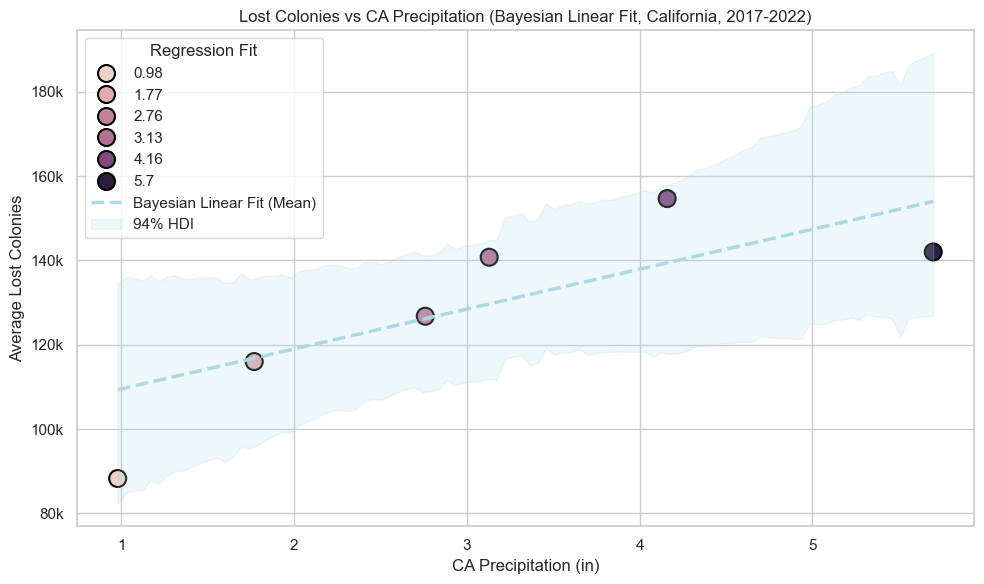


Bayesian Linear Regression Summary:
                 mean         sd     hdi_3%     hdi_97%  mcse_mean  mcse_sd  \
intercept  100051.251  17421.655  70654.139  137575.168    569.035  459.318   
slope        9464.668   5137.626  -1007.087   18388.215    159.089  136.839   
sigma       20557.247   9342.970   8779.840   38152.052    293.217  395.950   

           ess_bulk  ess_tail  r_hat  
intercept     991.0    1167.0   1.01  
slope        1091.0    1154.0   1.00  
sigma         851.0     956.0   1.00  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az

sns.set(style="whitegrid")  # Set the style for seaborn plots

# Data from the PDF
data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022],
    'Lost Colonies Average': [126750, 142000, 154666.6667, 140750, 116000, 88250],  # California honey bee data
    'CA Precipitation (in)': [2.76, 5.7, 4.16, 3.13, 1.77, 0.98],  # California precipitation
    'CA Temp Departure (°F)': [2.4, -2.4, -2.0, -2.8, -3.2, 2.2],  # California temp departure
    'SJ Valley Precipitation (in)': [1.11, 4.71, 2.66, 2.82, 1.18, 1.11],  # San Joaquin Valley precipitation
    'SJ Valley Temp Departure (°F)': [1.2, -2.0, -1.5, -2.2, -2.8, 2.2]  # San Joaquin Valley temp departure
}

# Create DataFrame
df = pd.DataFrame(data)



# Bayesian Linear Regression with PyMC
x = df['CA Precipitation (in)'].values
y = df['Lost Colonies Average'].values

with pm.Model() as model:
    # Priors for intercept and slope
    intercept = pm.Normal('intercept', mu=np.mean(y), sigma=50000)  # Wide prior for intercept
    slope = pm.Normal('slope', mu=0, sigma=20000)  # Wide prior for slope
    sigma = pm.HalfNormal('sigma', sigma=50000)  # Prior for error term

    # Expected value of outcome
    mu = intercept + slope * x

    # Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)

    # Posterior sampling
    trace = pm.sample(1000, tune=1000, return_inferencedata=True, random_seed=42)

# Plot the data and Bayesian regression results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CA Precipitation (in)', y='Lost Colonies Average', hue='CA Precipitation (in)',
                data=df, s=150, edgecolor='black', linewidth=1.5)

# Posterior predictive regression line and 94% HDI
x_new = np.linspace(df['CA Precipitation (in)'].min(), df['CA Precipitation (in)'].max(), 100)
posterior = trace.posterior
intercept_mean = posterior['intercept'].mean().values
slope_mean = posterior['slope'].mean().values
y_pred = intercept_mean + slope_mean * x_new

# Compute posterior predictive samples for HDI
y_samples = np.zeros((len(x_new), 1000))
for i, x_val in enumerate(x_new):
    y_samples[i] = posterior['intercept'].values.flatten()[:1000] + posterior['slope'].values.flatten()[:1000] * x_val

# Calculate 94% HDI
hdi = az.hdi(y_samples.T, hdi_prob=0.94)

plt.plot(x_new, y_pred, color='lightblue', linestyle='--', linewidth=2.5,
         label='Bayesian Linear Fit (Mean)')
plt.fill_between(x_new, hdi[:, 0], hdi[:, 1], color='lightblue', alpha=0.2,
                 label='94% HDI')

plt.title('Lost Colonies vs CA Precipitation (Bayesian Linear Fit, California, 2017-2022)')
plt.ylabel('Average Lost Colonies')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
plt.legend(title='Regression Fit')
plt.tight_layout()
plt.show()

# Print Bayesian results
print("\nBayesian Linear Regression Summary:")
print(az.summary(trace, var_names=['intercept', 'slope', 'sigma'], hdi_prob=0.94))



